# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:

# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import time

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# city_url =  f"{url}lat={lats}&lon={lngs}&appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data (***Do we need the params in here?***)
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | okha
Processing Record 4 of Set 1 | as sulayyil
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | bykhaw
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | langepas
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | san julian
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | okondja
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | chinsali
Processing Record 22 of Set 1 | gorontalo
Proc

In [4]:
len(city_data)

545

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
# city_data_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.73,90,34,2.90,CL,1712700660
1,isafjordur,66.0755,-23.1240,-2.23,91,100,2.77,IS,1712700877
2,okha,53.5739,142.9478,-8.19,91,22,4.47,RU,1712700877
3,as sulayyil,20.4607,45.5779,27.14,49,88,7.54,SA,1712700878
4,mount gambier,-37.8333,140.7667,13.84,85,93,2.13,AU,1712700878
...,...,...,...,...,...,...,...,...,...
540,mananjary,-21.2167,48.3333,24.09,87,37,4.02,MG,1712701081
541,annau,37.8876,58.5160,17.18,50,0,3.70,TM,1712701082
542,undurkhaan,47.3194,110.6556,4.85,74,64,1.04,MN,1712701082
543,tsiombe,-25.3000,45.4833,23.24,96,98,1.40,MG,1712701082


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.73,90,34,2.90,CL,1712700660
1,isafjordur,66.0755,-23.1240,-2.23,91,100,2.77,IS,1712700877
2,okha,53.5739,142.9478,-8.19,91,22,4.47,RU,1712700877
3,as sulayyil,20.4607,45.5779,27.14,49,88,7.54,SA,1712700878
4,mount gambier,-37.8333,140.7667,13.84,85,93,2.13,AU,1712700878


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.73,90,34,2.90,CL,1712700660
1,isafjordur,66.0755,-23.1240,-2.23,91,100,2.77,IS,1712700877
2,okha,53.5739,142.9478,-8.19,91,22,4.47,RU,1712700877
3,as sulayyil,20.4607,45.5779,27.14,49,88,7.54,SA,1712700878
4,mount gambier,-37.8333,140.7667,13.84,85,93,2.13,AU,1712700878


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

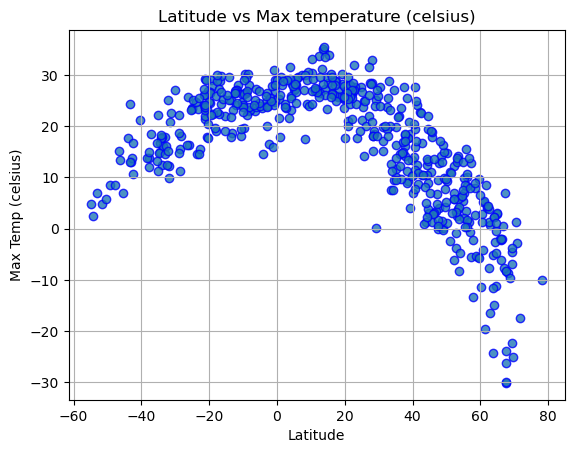

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_maxtemp = city_data_df["Max Temp"]
plt.scatter(x_values, y_maxtemp, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
    #*** This is not working **
plt.grid(True)
plt.title("Latitude vs Max temperature (celsius)")
plt.ylabel("Max Temp (celsius)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.tight_layout
plt.show()

#### Latitude Vs. Humidity

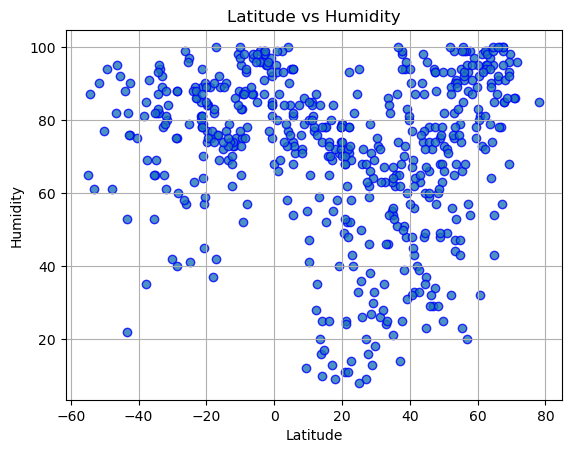

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_humidity = city_data_df["Humidity"]
plt.scatter(x_values, y_humidity, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

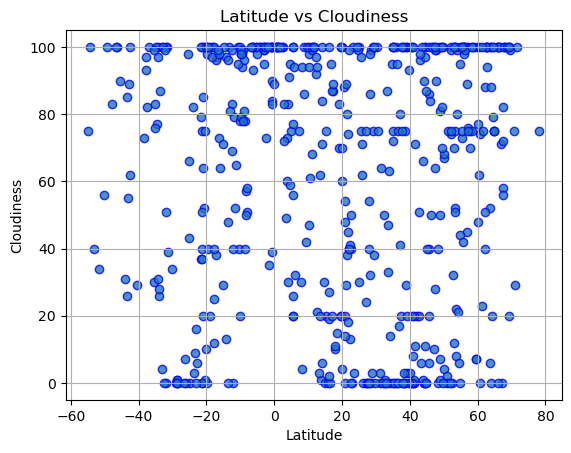

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]
plt.scatter(x_values, y_cloud, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

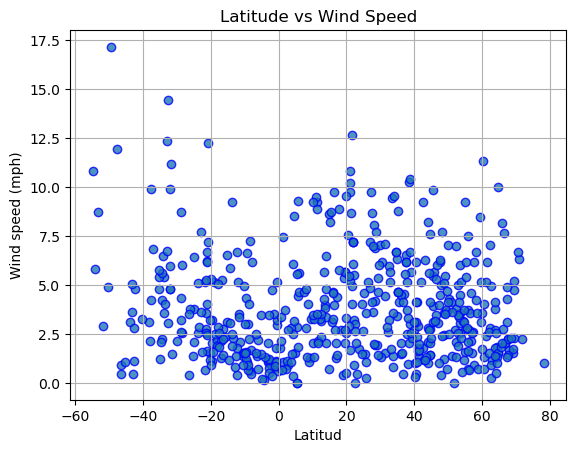

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]
plt.scatter(x_values, y_wind, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitud")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


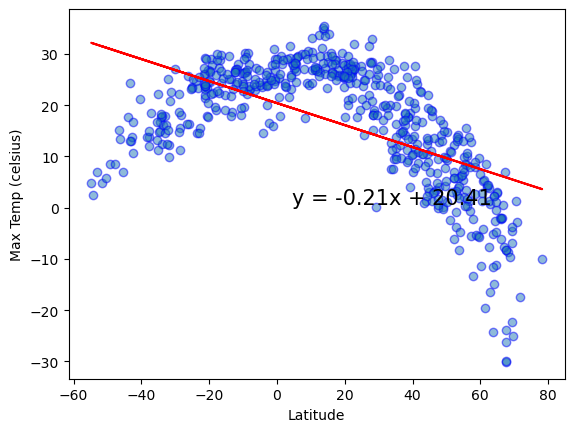

In [13]:
# Create Linear Regression plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_maxtemp = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_maxtemp)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_maxtemp,edgecolors="blue", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4.5,0.7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (celsius)')

plt.show()

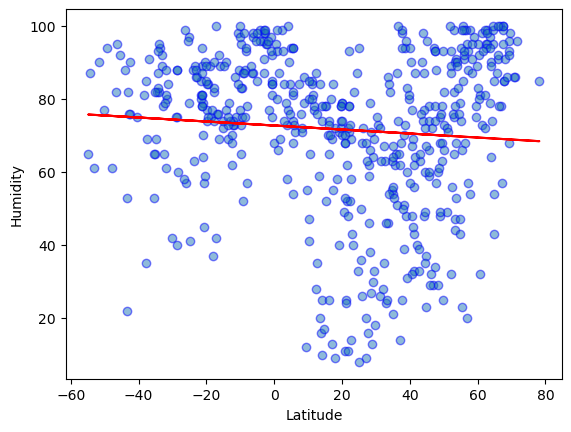

In [14]:
# Create Linear Regression plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_humidity = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_humidity)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_humidity,edgecolors="blue", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4.5,0.7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

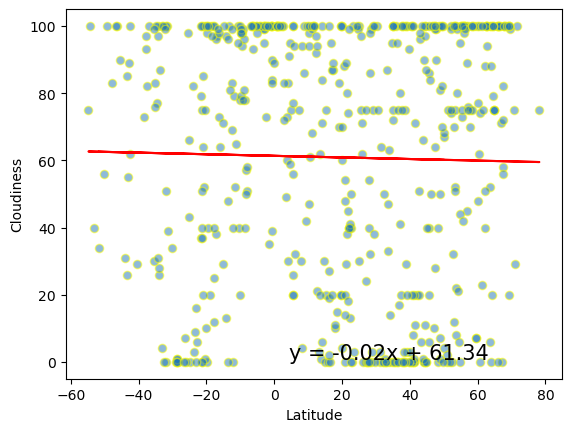

In [15]:
# Create Linear Regression plot for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_cloud)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_cloud,edgecolors="yellow", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4.5,0.7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

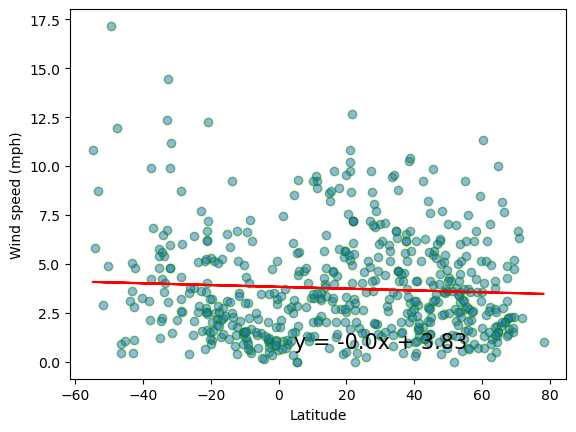

In [16]:
# Create Linear Regression plot for latitude vs. wind
x_values = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_wind)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_wind,edgecolors="green", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4.5,0.7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')

plt.show()

In [17]:
#Define a function to create linear regression plots
def linear_reg(x_values, y_values, title, y_label):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq,(5.8,0.8),fontsize=12,color="black")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,isafjordur,66.0755,-23.1240,-2.23,91,100,2.77,IS,1712700877
2,okha,53.5739,142.9478,-8.19,91,22,4.47,RU,1712700877
3,as sulayyil,20.4607,45.5779,27.14,49,88,7.54,SA,1712700878
5,jamestown,42.0970,-79.2353,22.80,40,20,5.14,US,1712700457
6,laguna,38.4210,-121.4238,25.42,39,0,2.06,US,1712700878


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.73,90,34,2.90,CL,1712700660
4,mount gambier,-37.8333,140.7667,13.84,85,93,2.13,AU,1712700878
8,port saint john's,-31.6229,29.5448,20.77,80,100,11.20,ZA,1712700607
11,blackmans bay,-43.0167,147.3167,13.07,82,55,0.45,AU,1712700880
14,bredasdorp,-34.5322,20.0403,16.82,82,77,4.24,ZA,1712700880


###  Temperature vs. Latitude Linear Regression Plot - Northern Hemisphere

The r-value is: 0.0031203195033913814


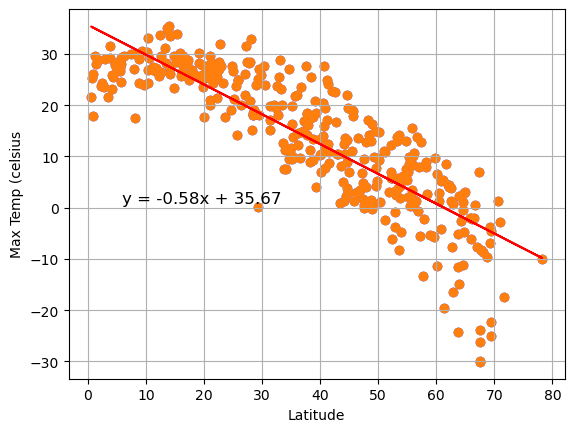

In [20]:
#Trying to see if r-value changes with norther and southern datasets
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"]
y_maxtemp = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_maxtemp, edgecolors="blue", alpha=0.8, label="Cities")
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_maxtemp)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_maxtemp)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(5.8,0.8),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (celsius")
print(f"The r-value is: {rvalue**2}")
plt.grid(True)
plt.show()


The r-value is: 0.0031203195033913814


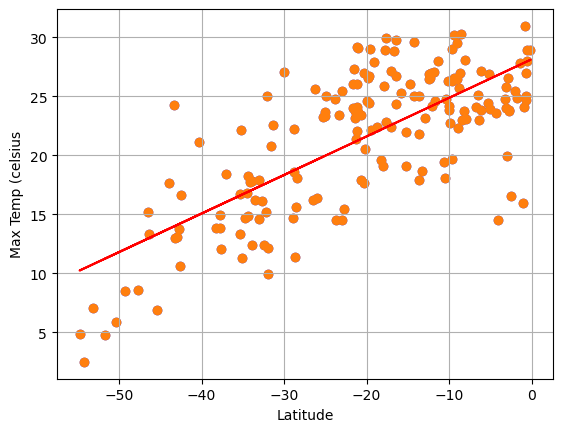

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df["Lat"]
y_maxtempS = southern_hemi_df["Max Temp"]
plt.scatter(x_values, y_maxtempS, edgecolors="blue", alpha=0.8, label="Cities")
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_maxtempS)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_maxtempS)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(5.8,0.8),fontsize=12,color="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (celsius")
print(f"The r-value is: {rvalue**2}")
plt.grid(True)
plt.show()

The r-value is: 0.0031203195033913814


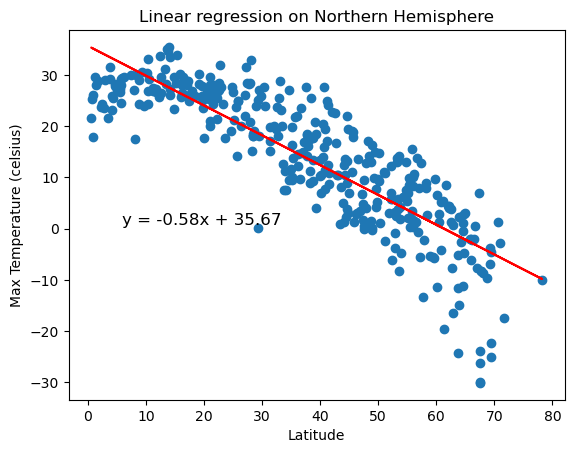

In [22]:
# Linear regression on Northern Hemisphere on Temperature vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = ("Linear regression on Northern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Max Temperature (celsius)")


###  Temperature vs. Humidity Linear Regression Plot - Northern Hemisphere

The r-value is: 0.0031203195033913814


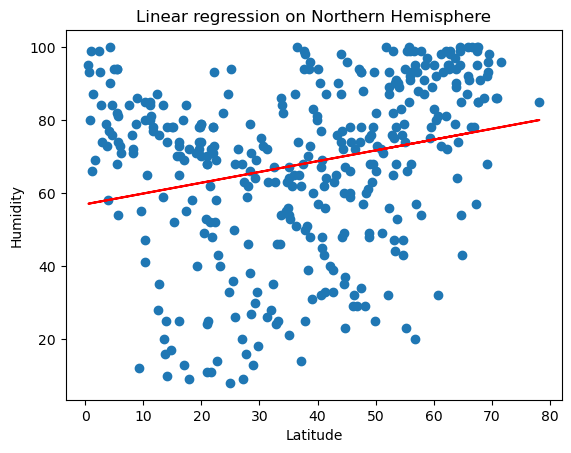

In [23]:
# Linear regression on Northern Hemisphere on Temperature vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = ("Linear regression on Northern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Humidity")


###  Temperature vs. Cloud Linear Regression Plot - Northern Hemisphere

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value is: 0.0031203195033913814


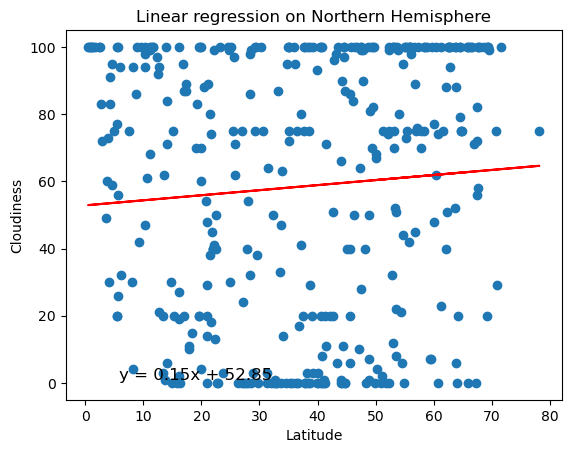

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = ("Linear regression on Northern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Cloudiness")


###  Temperature vs. wind Linear Regression Plot - Northern Hemisphere

The r-value is: 0.0031203195033913814
The r-value is: 0.0031203195033913814


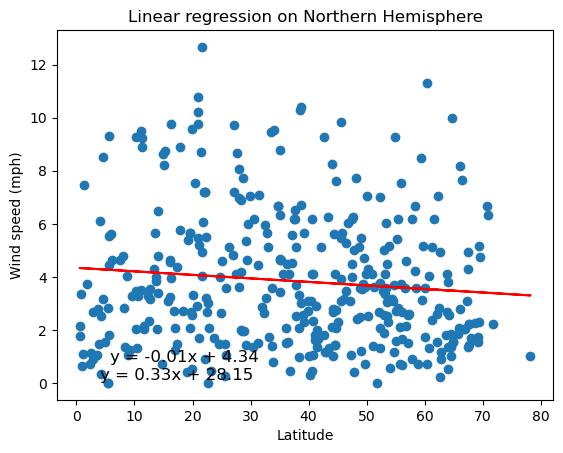

In [25]:
# Linear regression on Northern Hemisphere on Wind
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = ("Linear regression on Northern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Wind speed")

plt.annotate(line_eq,(4.0,0.13),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
print(f"The r-value is: {rvalue**2}")
plt.show()

###  Latitude vs. temperature Linear Regression Plot - Southern Hemisphere

The r-value is: 0.0031203195033913814
The r-value is: 0.0031203195033913814


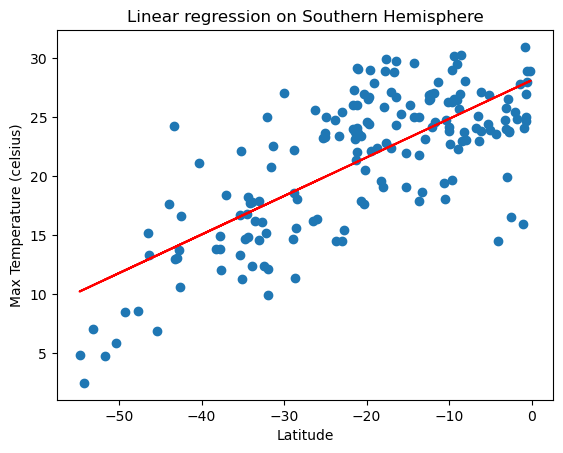

In [26]:
# Linear regression on Southern Hemisphere on max temperatures
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = ("Linear regression on Southern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Max Temperature (celsius)")

plt.annotate(line_eq,(4.0,0.13),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (celsius)")
print(f"The r-value is: {rvalue**2}")
plt.show()

###  Temperature vs. humidity Linear Regression Plot - Southern Hemisphere

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value is: 0.0031203195033913814
The r-value is: 0.0031203195033913814


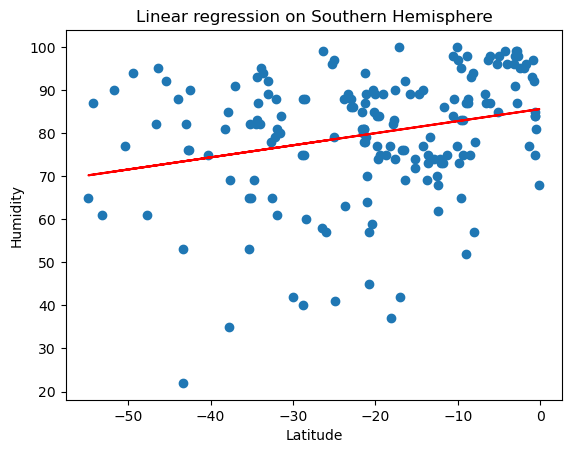

In [27]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = ("Linear regression on Southern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Humidity")

plt.annotate(line_eq,(4.0,0.13),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

###  Temperature vs. Cloud Linear Regression Plot - Southern Hemisphere

The r-value is: 0.0031203195033913814
The r-value is: 0.0031203195033913814


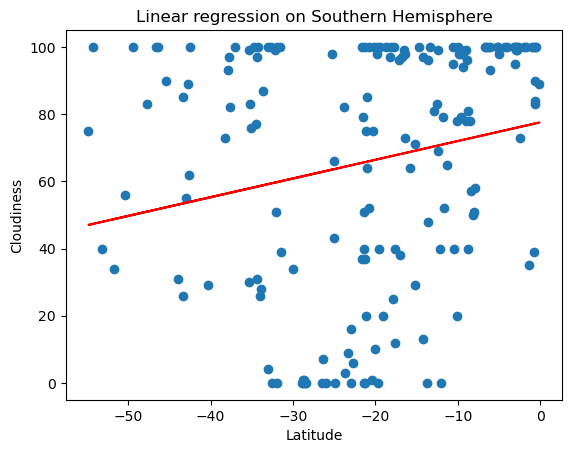

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = ("Linear regression on Southern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Cloudiness")

plt.annotate(line_eq,(4.0,0.13),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

###  Temperature vs. Wind Linear Regression Plot - Southern Hemisphere

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value is: 0.0031203195033913814
The r-value is: 0.0031203195033913814


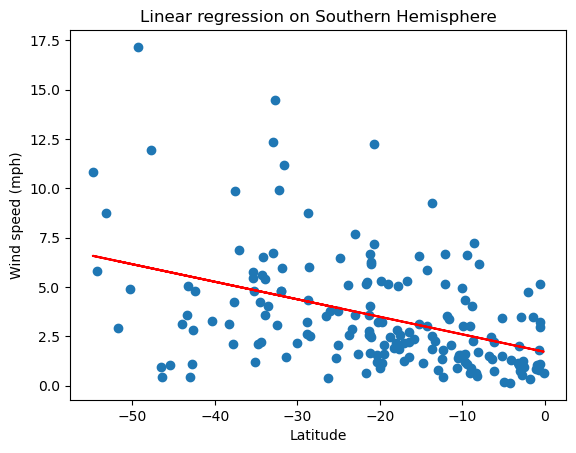

In [29]:
# Linear regression on Northern Hemisphere on Wind
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = ("Linear regression on Southern Hemisphere")

#Use the function created to find the linear regression
linear_reg(x_values, y_values, title, "Wind speed")

plt.annotate(line_eq,(4.0,0.13),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE